# Exploring Why Civil Resistance Works

In the assignment, we will examine the pivotal insights of [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. Their findings revealed a compelling trend – peaceful campaigns generally prove more efficacious in achieving their objectives compared to their violent counterparts. This exploration will delve into the nuances and implications of their research, shedding light on the dynamics of civil resistance.

Let's start by importing some usefull libraries...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## 1. Exploration of Historical Trends

We're going to start by creating a plot showing the frequency of nonviolent and violent campaigns with their counts being stacked on each other.  
We'll be using the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX) with some minor modifications.

In [2]:
navco = pd.read_table('NAVCO 1.2 Updated.tab')
# remove rows with all NaNs
navco = navco.dropna(how='all')
navco.head()

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [3]:
campaigns_by_years = navco[['EYEAR', 'VIOL', 'NONVIOL']]
campaigns_by_years.loc[:,'EYEAR'] = campaigns_by_years['EYEAR'] // 10 * 10 # round to nearest decade
campaigns_by_years = campaigns_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['VIOL', 'NONVIOL']].sum().reset_index()
campaigns_by_years.columns = ['Decade', 'Violent', 'Nonviolent']
campaigns_by_years.set_index('Decade', inplace=True)
campaigns_by_years

,Violent,Nonviolent
Decade,,
1940.0,12.0,2.0
1950.0,25.0,9.0
1960.0,21.0,8.0
1970.0,27.0,13.0
1980.0,17.0,30.0
1990.0,54.0,36.0
2000.0,23.0,37.0
2010.0,41.0,34.0


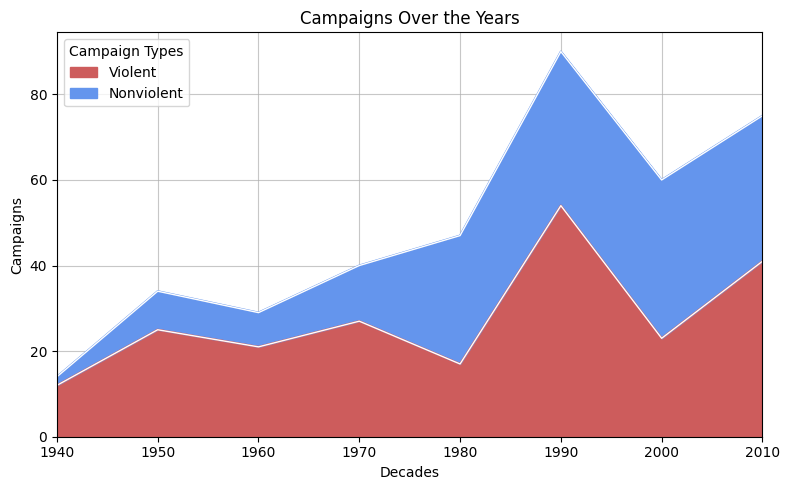

In [4]:
ax = campaigns_by_years.plot.area(figsize=(8, 5), color=['indianred', 'cornflowerblue'])

ax.set_xlabel("Decades")
ax.set_ylabel("Campaigns")
ax.set_title("Campaigns Over the Years")

ax.legend(title="Campaign Types", loc='upper left')

ax.set_axisbelow(True)

plt.grid(True, linestyle='-', alpha=0.7)
plt.margins(0, 0)

ax.plot(campaigns_by_years.index, campaigns_by_years['Violent'], color='white', linewidth=1)
ax.plot(campaigns_by_years.index, campaigns_by_years.sum(axis=1), color='white', linewidth=1)

plt.tight_layout()
plt.show()

* As we can see, as time goes by the number of nonviolent campaigns goes up!  
  (In the 1940's they were almost 15% of the total campaigns and in the 2010's they're 45%.)

* In the 1980's and 2000's they were actually more than the violent ones.

* The total number of campaigns in the 2010's is almost 5 times that of the 1940's.

In [5]:
nonviol_success_by_years = navco[navco['NONVIOL']==1][['EYEAR', 'NONVIOL', 'SUCCESS']]
nonviol_success_by_years.loc[:,'EYEAR'] = nonviol_success_by_years['EYEAR'] // 10 * 10
nonviol_success_by_years = nonviol_success_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['NONVIOL', 'SUCCESS']].sum().reset_index()
nonviol_success_by_years.loc[:, 'SUCCESS'] = (nonviol_success_by_years['SUCCESS'] / nonviol_success_by_years['NONVIOL']).round(2)
nonviol_success_by_years.columns = ['Decade', 'Nonviolent', 'Success Percentage']
nonviol_success_by_years.set_index('Decade', inplace=True)
nonviol_success_by_years

,Nonviolent,Success Percentage
Decade,,
1940.0,2.0,0.50
1950.0,9.0,0.22
1960.0,8.0,0.25
1970.0,13.0,0.54
1980.0,30.0,0.47
1990.0,36.0,0.83
2000.0,37.0,0.68
2010.0,34.0,0.38


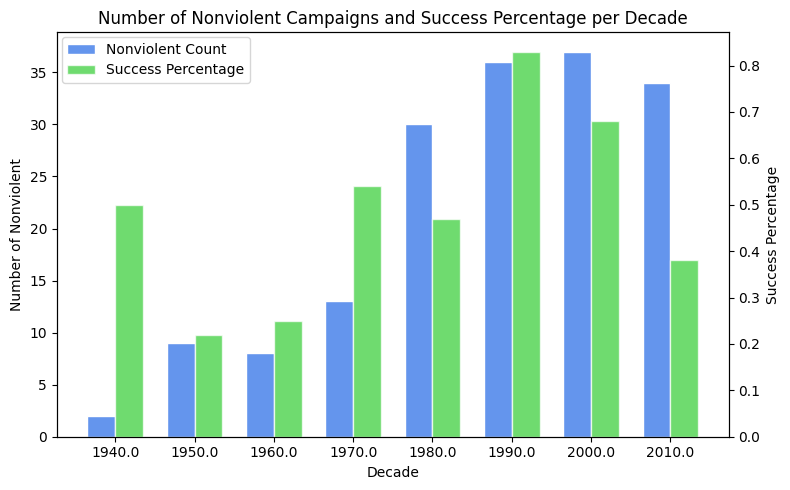

In [6]:
decades = nonviol_success_by_years.index
nonviolent_counts = nonviol_success_by_years['Nonviolent']
success_percentages = nonviol_success_by_years['Success Percentage']

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the left axis (Nonviolent count)
bar_width = 0.35
bar1 = np.arange(len(decades))
bar2 = [x + bar_width for x in bar1]

ax1.bar(bar1, nonviolent_counts, width=bar_width, edgecolor='white', linewidth=1, color='cornflowerblue', label='Nonviolent Count')

ax1.set_xlabel('Decade')
ax1.set_ylabel('Number of Nonviolent')
ax1.set_xticks([r + bar_width / 2 for r in range(len(decades))])
ax1.set_xticklabels(decades)
ax1.tick_params('y')

# Plot the right axis (Success Percentage)
ax2 = ax1.twinx()
ax2.bar(bar2, success_percentages, width=bar_width, edgecolor='white', linewidth=1, color='limegreen', alpha=0.7, label='Success Percentage')
ax2.set_ylabel('Success Percentage')
ax2.tick_params('y')

plt.title('Number of Nonviolent Campaigns and Success Percentage per Decade')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.075, 0.93))

plt.show()

* As time progresses, there appears to be an upward trend in the success rates of nonviolent campaigns (and their counts too).

In [7]:
campaigns_success_by_years = navco[['EYEAR', 'NONVIOL', 'VIOL']]
campaigns_success_by_years['NONVIOL SUCCESS'] = navco[navco['NONVIOL']==1]['SUCCESS']
campaigns_success_by_years['VIOL SUCCESS'] = navco[navco['VIOL']==1]['SUCCESS']
campaigns_success_by_years.loc[:,'EYEAR'] = campaigns_success_by_years['EYEAR'] // 10 * 10
campaigns_success_by_years = campaigns_success_by_years.sort_values(by='EYEAR', ascending=True).groupby('EYEAR')[['NONVIOL', 'VIOL', 'NONVIOL SUCCESS', 'VIOL SUCCESS']].sum().reset_index()
campaigns_success_by_years.loc[:, 'NONVIOL SUCCESS'] = (campaigns_success_by_years['NONVIOL SUCCESS'] / campaigns_success_by_years['NONVIOL']).round(2)
campaigns_success_by_years.loc[:, 'VIOL SUCCESS'] = (campaigns_success_by_years['VIOL SUCCESS'] / campaigns_success_by_years['VIOL']).round(2)
campaigns_success_by_years.columns = ['Decade', 'Nonviolent', 'Violent', 'Nonviolent Success Rate', 'Violent Success Rate']
campaigns_success_by_years.set_index('Decade', inplace=True)
campaigns_success_by_years

C:\Users\eugep\AppData\Local\Temp\ipykernel_13128\2025387825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns_success_by_years['NONVIOL SUCCESS'] = navco[navco['NONVIOL']==1]['SUCCESS']
C:\Users\eugep\AppData\Local\Temp\ipykernel_13128\2025387825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns_success_by_years['VIOL SUCCESS'] = navco[navco['VIOL']==1]['SUCCESS']


,Nonviolent,Violent,Nonviolent Success Rate,Violent Success Rate
Decade,,,,
1940.0,2.0,12.0,0.50,0.50
1950.0,9.0,25.0,0.22,0.32
1960.0,8.0,21.0,0.25,0.19
1970.0,13.0,27.0,0.54,0.44
1980.0,30.0,17.0,0.47,0.29
1990.0,36.0,54.0,0.83,0.28
2000.0,37.0,23.0,0.68,0.13
2010.0,34.0,41.0,0.38,0.07


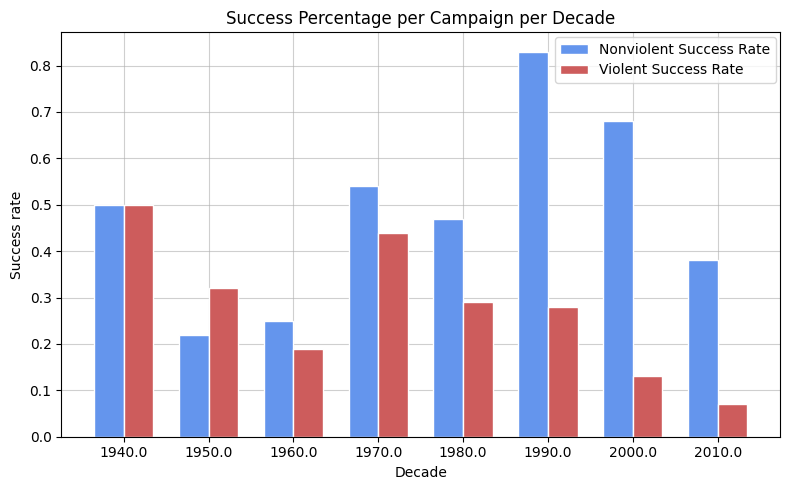

In [8]:
decades = campaigns_success_by_years.index
nonviolent_success = campaigns_success_by_years['Nonviolent Success Rate']
violent_success = campaigns_success_by_years['Violent Success Rate']

fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
bar1 = np.arange(len(decades))
bar2 = [x + bar_width for x in bar1]

ax1.bar(bar1, nonviolent_success, width=bar_width, edgecolor='white', linewidth=1, color='cornflowerblue', label='Nonviolent Success Rate')
ax1.bar(bar2, violent_success, width=bar_width, edgecolor='white', linewidth=1, color='indianred', label='Violent Success Rate')

ax1.set_xlabel('Decade')
ax1.set_ylabel('Success rate')
ax1.set_xticks([r + bar_width / 2 for r in range(len(decades))])
ax1.set_xticklabels(decades)
ax1.tick_params('y')

ax1.set_axisbelow(True)

plt.grid(True, linestyle='-', alpha=0.6)

plt.title('Success Percentage per Campaign per Decade')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.985, 0.93))

plt.show()

* It is clear at a glance that the effectiveness of violent campaigns in the 2010's has become almost **7** times lower than it was in the 1940s.

* Over time, a prevailing pattern suggests that nonviolent campaigns are becoming **more** effective compared to their violent counterparts.

## 2. Largest Resistance Campaigns, 1946-2014

It would be beneficial now to investigate the performance of the most substantial resistance campaigns. In order to do that we'll generate a horizontal bar plot for resistance campaigns spanning all years, featuring only those with a participation percentage of 2.0% or higher.

In [9]:
largest_campaigns = navco[navco['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02][['LOCATION', 'TARGET', 'PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'LIMITED', 'FAILURE']]
largest_campaigns = largest_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION')
largest_campaigns.loc[:, 'PERCENTAGEPOPULARPARTICIPATION'] = (largest_campaigns['PERCENTAGEPOPULARPARTICIPATION'] * 100).round(2)
largest_campaigns['CAMPAIGN'] = largest_campaigns['LOCATION'] + ": " + largest_campaigns['TARGET']
largest_campaigns.set_index('CAMPAIGN', inplace=True)
largest_campaigns = largest_campaigns[['PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'LIMITED', 'FAILURE']]
largest_campaigns.head()

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,LIMITED,FAILURE
CAMPAIGN,,,,
Hungary: communist regime,2.03,0.0,0.0,1.0
East Germany: Communist regime,2.20,0.0,0.0,1.0
Ukraine: President Yanukovych,2.21,1.0,0.0,0.0
South Korea: Mil govt,2.40,1.0,0.0,0.0
Serbia: Milosevic regime,2.66,1.0,0.0,0.0


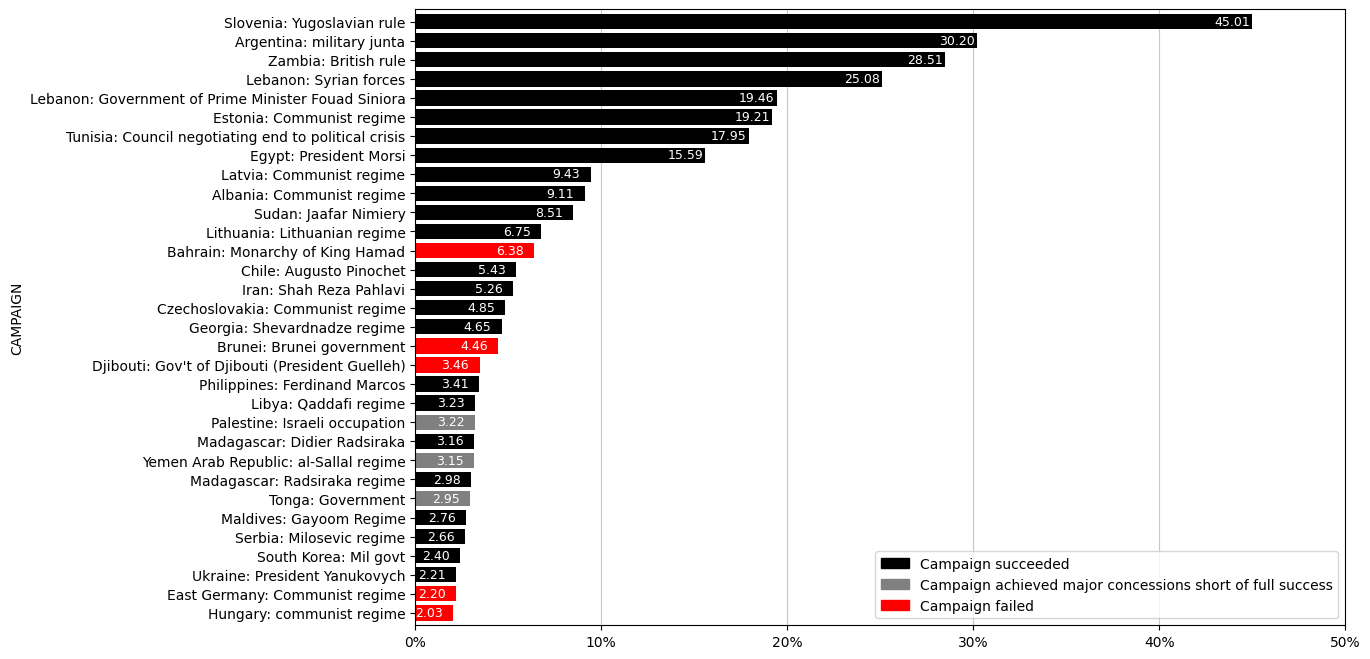

In [10]:
colors = np.where(largest_campaigns['SUCCESS'] == 1, 'black', 
                  np.where(largest_campaigns['LIMITED'] == 1, 'grey', 'red'))

ax = largest_campaigns['PERCENTAGEPOPULARPARTICIPATION'].plot(kind='barh', figsize=(12, 8), width=0.8, color=colors)

ax.set_xlim(0, 50)
ax.set_xticks(range(0, 51, 10))
ax.set_xticklabels([f'{x}%' for x in range(0, 51, 10)])

ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='-', alpha=0.7)

# add the percentage population as labels on the bars
for index, value in enumerate(largest_campaigns['PERCENTAGEPOPULARPARTICIPATION']):
    ax.text(value - 2.04, index, str('{0:.2f}'.format(value)), va='center', fontsize=9, color='white')

legend_labels = {'black': 'Campaign succeeded', 'grey': 'Campaign achieved major concessions short of full success', 'red': 'Campaign failed'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=legend_handles, loc='lower right')

plt.show()

* It's evident that campaigns with a greater percentage of the population involved tend to be successful.  
  Consistently, success is observed when the population involvement surpasses 6.75%.

* It would be possibly insightful to examime why the Bahrain campaign with 6.38% of population participating failed.

* But what about Greece?

As anticipated, Greece was omitted from the bar plot, prompting a closer examination.

In [11]:
navco[navco['LOCATION']=='Greece'][['CAMPAIGN', 'BYEAR', 'EYEAR', 'TARGET', 'SUCCESS', 'LIMITED', 'FAILURE', 'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION']].sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=False)

,CAMPAIGN,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION
119,Greek Civil War,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,40000.0,0.005092
120,Greek anti-military,1973.0,1974.0,Military rule,1.0,0.0,0.0,2500.0,0.000279


* The first output is about the [Greek Civil War](https://en.wikipedia.org/wiki/Greek_Civil_War) (1946-1949) which consisted of a communist-dominated uprising (0.5% of the population involved) against the established government of the Kingdom of Greece and ended with the the Greek government forces ultimately prevailing.

* The second output refers to the Greek Anti-Military Campaign (1973-1974), which peaked with the [Athens Polytechnic Uprising](https://en.wikipedia.org/wiki/Athens_Polytechnic_uprising) in November 1973, a massive student demonstration (however less than **0.03%** of the population involved) of popular rejection of the Greek military junta which ended with the fall of the junta and the restoration of democracy in Greece on the 24th of July in 1974.

* Notably, Polytechneio students, despite being 16 times fewer than those involved in the uprising against the Greek government in 1946-1949, successfully achieved their goals and played a crucial role in the junta's downfall.

## 3. The Effect of Participation on the Probability of Campaign Success

But how substantial is the role that participation truly plays? Let's examine the effect of participation on the probability of campaign success by running a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends.

In [12]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit

In [13]:
success = navco[['SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION', 'PARTICIPATION']]
# drop the lines that have na on all 3 columns
success = success.dropna(how='all', subset=['SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION', 'PARTICIPATION'])
# where percentage popular participation is 0, it's because it's very small compared to the population
# so we'll just set population to 10**8 as a close approximation
success.loc[:, 'POPULATION'] = np.where(success['PERCENTAGEPOPULARPARTICIPATION'] == 0, 10**8, success['PARTICIPATION'] / success['PERCENTAGEPOPULARPARTICIPATION'])

* To find out what Membership per Capita is we should check the [NAVCO 1.1 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YLLHEE) codebook. There we see that:


  $$ \text{Membership per Capita} = \frac{\log_{10}(\text{Participation})}{\log_{10}(\text{Population})}


In [14]:
success['MEMBERSHIPPERCAPITA'] = np.log10(success['PARTICIPATION']) / np.log10(success['POPULATION'])

* So now we're set to run the regression!

In [15]:
success_logit_mod = logit("SUCCESS ~ MEMBERSHIPPERCAPITA + np.log10(POPULATION)", data=success)
success_logit_res = success_logit_mod.fit()

success_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   SUCCESS          Pseudo R-squared: 0.130     
Date:                 2024-02-16 11:32 AIC:              447.3747  
No. Observations:     380              BIC:              459.1952  
Df Model:             2                Log-Likelihood:   -220.69   
Df Residuals:         377              LL-Null:          -253.58   
Converged:            1.0000           LLR p-value:      5.1893e-15
No. Iterations:       6.0000           Scale:            1.0000    
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
MEMBERSHIPPERCAPITA   7.6475   1.1664  6.5563 0.0000  5.3613 9.9336
np.log10(POPULATION) -0.3196   0.1694 -1.8871 0.0591 -0.6516 0.0123
===================================================================

"""

* Our model is considered pretty good (pseudo-$R^2$ = 0.13)

* The results indicate that membership per capita is strongly associated with the success of the campaign ($p\textrm{-value} \approx 0.0$)

* The $p\textrm{-value}$ for $\log_{10}(\text{Population})$ is close to our threshold so they could be associated as well.

* The observation that $\log_{10}(\text{Population})$ exhibits an unexpected negative correlation with success appears to be somewhat peculiar.  
So let's delve deeper into this...

In [16]:
mod = smf.ols("PERCENTAGEPOPULARPARTICIPATION ~ POPULATION", data=success)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PERCENTAGEPOPULARPARTICIPATION   R-squared:                       0.006
Model:                                        OLS   Adj. R-squared:                  0.004
Method:                             Least Squares   F-statistic:                     2.424
Date:                            Fri, 16 Feb 2024   Prob (F-statistic):              0.120
Time:                                    11:32:27   Log-Likelihood:                 711.01
No. Observations:                             389   AIC:                            -1418.
Df Residuals:                                 387   BIC:                            -1410.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.002      5.496      0.000       0.007       0.016
POPULATION -1.446e-11   9.29e-12     -1.557      0.120   -3.27e-11     3.8e-12
==============================================================================
Omnibus:                      545.886   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62786.023
Skew:                           7.200   Prob(JB):                         0.00
Kurtosis:                      63.550   Cond. No.                     2.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Indeed, our suspicions were accurate; as a country's population increases, the percentage of people participating tends to decrease.

* This could be possibly explained by an instance of the [Bystander Effect](https://en.wikipedia.org/wiki/Bystander_effect). As the population grows, individuals often presume that others will take action on their behalf, leading to a lack of personal initiative. In contrast, with a smaller population, people tend to be more cognizant that they must take proactive measures.

Now that we shed light into that, let's take a look at our previous results.

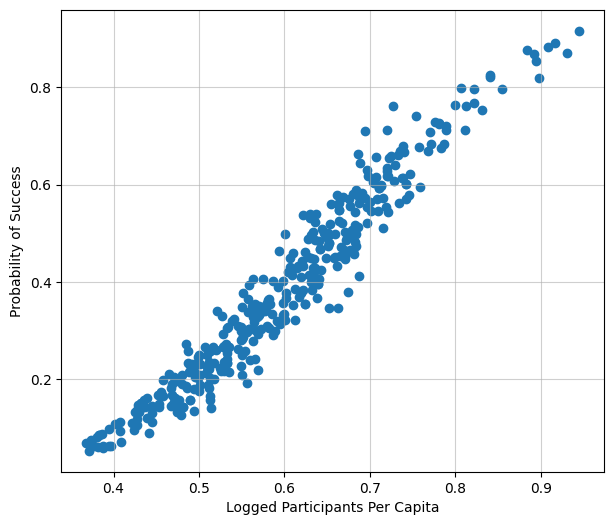

In [17]:
success_predicted_with_control = success_logit_res.predict(success[['MEMBERSHIPPERCAPITA', 'POPULATION']])

fig, ax = plt.subplots(figsize=(7, 6))

plt.scatter(success['MEMBERSHIPPERCAPITA'], success_predicted_with_control)
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True, linestyle='-', alpha=0.6)

plt.show()

* Since we have more than one dependent value, the scatterplot is theoretically multidimensional, with points scattered across various levels based on the combination of the Membership per Capita and Logged Population. Hence our plot doesn't look like a continuous line and there seems to have some 'noise' in it.

* The scatterplot shows a slightly increased dispersion in the predicted probabilities within a specific range of Membership per Capita (0.5 to 0.8), it indicates that the logged Population difference within this range contributes to the variability in the probability of success.

* What if we exclude the logged population to observe the direct effect of Membership per Capita on the probability of success?

In [18]:
success_logit_mod = logit("SUCCESS ~ MEMBERSHIPPERCAPITA", data=success)
success_logit_res = success_logit_mod.fit()

success_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   SUCCESS          Pseudo R-squared: 0.123     
Date:                 2024-02-16 11:32 AIC:              449.0222  
No. Observations:     380              BIC:              456.9026  
Df Model:             1                Log-Likelihood:   -222.51   
Df Residuals:         378              LL-Null:          -253.58   
Converged:            1.0000           LLR p-value:      3.2041e-15
No. Iterations:       6.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -5.3469   0.7095 -7.5362 0.0000 -6.7375 -3.9563
MEMBERSHIPPERCAPITA  8.0495   1.1414  7.0524 0.0000  5.8125 10.2866
===================================================================

"""

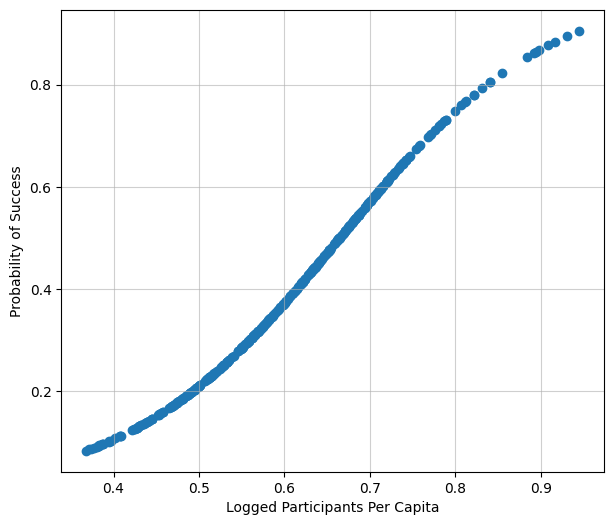

In [19]:
success_predicted = success_logit_res.predict(success[['MEMBERSHIPPERCAPITA']])

fig, ax = plt.subplots(figsize=(7, 6))

plt.scatter(success['MEMBERSHIPPERCAPITA'], success_predicted)
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True, linestyle='-', alpha=0.6)

plt.show()

* Utilizing a single dependent variable in our logistic regression results in more consistent data points, creating a nearly continuous line.

* From around 0.4 until 0.8 our data points seem more dense, comparing to the rest.

## 4. The Level of Participation Tipping Point

A famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.  
We can create a table and explain how Chenoweth came up with the rule.

In [20]:
table_data = navco[['PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS']].dropna(how='all', subset=['SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION'])
table_data['PERCENTAGEPOPULARPARTICIPATION'] = table_data['PERCENTAGEPOPULARPARTICIPATION'] * 100

bins=[0, 0.0035, 0.015, 0.06, 0.25, 1, 3.5, 100]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1%', '1% - 3.5%', 'greater than 3.5%']

table_data['bins'] = pd.cut(table_data['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels)
table_data = table_data.groupby('bins')['SUCCESS'].agg(['count', 'sum']).reset_index().sort_values(by='bins', ascending=False)
table_data['Success Rate'] = ((table_data['sum'] / table_data['count']).round(4) * 100).apply(lambda x: '{0:.2f}%'.format(x))
table_data = table_data[['bins', 'count', 'Success Rate']]
table_data.columns = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']
table_data = table_data.to_html(index=False)

In [21]:
from IPython.display import HTML

display(HTML(table_data))

Peak Popular Participation (%),Observations,Success Rate
greater than 3.5%,18,88.89%
1% - 3.5%,41,60.98%
0.25% - 1%,92,45.65%
0.06% - 0.25%,95,45.26%
0.015% - 0.06%,66,24.24%
0.0035% - 0.015%,44,9.09%
less than 0.0035%,24,4.17%


* With more than 3.5% of the population involved in a campaign the success rate is 88.89%. So what did Chenoweth do?

* Simply, when she came up with this rule she was using the [NAVCO 1.1 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YLLHEE), which mistakenly excluded the case of Brunei with 4% participation in a failed uprising and had data up to 2006. So it didn't also include the uprsing against King Hamad in Bahrain (2011-2014) with 6% participation, which is considered a failure as well.

* But we can also derive a rule like hers in more statistically-based way. From the results we obtained in the previous question, we can find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

* We'll use the confidence intervals for that.

In [22]:
conf_intervals = success_logit_res.conf_int(alpha=0.05)  # 95% confidence interval
conf_intervals.columns = ['2.5%', '97.5%']
conf_intervals

,2.5%,97.5%
Intercept,-6.737471,-3.956310
MEMBERSHIPPERCAPITA,5.812452,10.286588


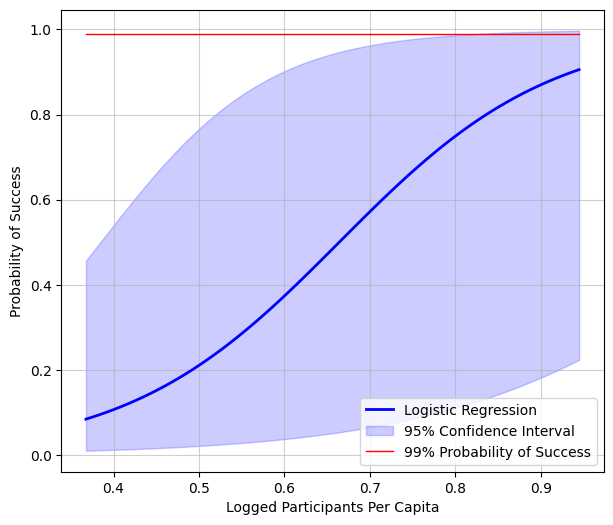

In [23]:
fig, ax = plt.subplots(figsize=(7, 6))

# plot the logistic regression line
x_values = np.linspace(success['MEMBERSHIPPERCAPITA'].min(), success['MEMBERSHIPPERCAPITA'].max(), 100)
y_values = 1 / (1 + np.exp(-(success_logit_res.params[0] + success_logit_res.params[1] * x_values)))

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Logistic Regression')

plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True, linestyle='-', alpha=0.6)

# plot the 95% confidence interval
lower_bound = 1 / (1 + np.exp(-(conf_intervals.loc['Intercept', '2.5%'] + conf_intervals.loc['MEMBERSHIPPERCAPITA', '2.5%'] * x_values)))
upper_bound = 1 / (1 + np.exp(-(conf_intervals.loc['Intercept', '97.5%'] + conf_intervals.loc['MEMBERSHIPPERCAPITA', '97.5%'] * x_values)))

plt.fill_between(x_values, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% Confidence Interval')

# plot the 99% probability of success line
probability_99 = [0.99 for x in x_values]

plt.plot(x_values, probability_99, color='red', linewidth=1, label='99% Probability of Success')

plt.legend(loc='lower right')
plt.show()

* Our objective is to identify the point at which the upper limit of the confidence intervals attains a 99% probability of success.

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} \Rightarrow 0.99 = \frac {1}{1+e^{-(-3.956310 + 10.286588 x)}} $$

In [24]:
from scipy.optimize import fsolve

def logistic_equation(x, intercept, slope):
    return 1 / (1 + np.exp(-(intercept + slope * x))) - 0.99

x_99 = fsolve(logistic_equation, x0=0.1, args=(conf_intervals.loc['Intercept', '97.5%'], conf_intervals.loc['MEMBERSHIPPERCAPITA', '97.5%']))[0].round(2)
x_99

0.83

* So we would have to have Membership per Capita equal to 0.83 in order to achieve 0.99 probability of success.

* Let's make an approaximation based on that for the percentage of the population.

In [25]:
success[success['MEMBERSHIPPERCAPITA'].round(2) == x_99][['PERCENTAGEPOPULARPARTICIPATION', 'MEMBERSHIPPERCAPITA']]

,PERCENTAGEPOPULARPARTICIPATION,MEMBERSHIPPERCAPITA
158,0.052632,0.831294


* So approximately, when at least 5% of the population are involved, there's 99% probability of success for the campaign!  
(An increase in the percentage of the population doesn't always coincide with a rise in membership per capita.)

## 5. Nonviolent Resistance and Target Regime Type

It has become crucial to examine whether nonviolent resistance remains significant even if we control for the regime type. That's why we will run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


In [26]:
polity = pd.read_excel('p5v2018.xls')

# keep only the values that are after 1946, since navco is from 1946 and after
polity = polity[polity['year'] >= 1946]

* Our first job is to merge the navco dataset with the polity dataset, in order to find the Polity V score for eachg campaign we have.

In [27]:
success_polity = polity[['cyear', 'polity2']]
navco_polity = navco[['SUCCESS', 'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'LOCATION', 'EYEAR', 'NONVIOL']]
navco_polity.loc[:, 'EYEAR'] = navco_polity['EYEAR'].astype(int)
navco_polity.loc[:, 'POPULATION'] = np.where(navco_polity['PARTICIPATION'] == 0, 10**8, navco_polity['PARTICIPATION'] / navco_polity['PERCENTAGEPOPULARPARTICIPATION'])
navco_polity = navco_polity.dropna()

# create a dictionary that maps the country to the ccode
country_to_ccode = dict(zip(polity['country'].unique(), polity['ccode'].unique()))

C:\Users\eugep\AppData\Local\Temp\ipykernel_13128\1529722140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  navco_polity.loc[:, 'POPULATION'] = np.where(navco_polity['PARTICIPATION'] == 0, 10**8, navco_polity['PARTICIPATION'] / navco_polity['PERCENTAGEPOPULARPARTICIPATION'])


* Sadly but as expected, not all the corresponding countries have the same name. 

* Here we are creating a function that suits best for our current country matching needs (after taking a look at our dataset).

In [28]:
import string

generic_words = ["west", "east", "south", "north", "democratic", "republic", "of", "the"]

def map_location_to_ccode(location):
    location = location.replace('-', ' ').replace('/', ' ')
    
    translator = str.maketrans('', '', string.punctuation)
    cleaned_location = location.translate(translator)
    
    location_words = cleaned_location.split()
    
    # exclude generic words from being matched
    filtered_words = [word for word in location_words if not any(word.lower().startswith(generic) for generic in generic_words)]
    
    for country, ccode in country_to_ccode.items():
        country_words = country.split()
        if any(word in filtered_words for word in country_words):
            return ccode
    return None


In [29]:
navco_polity['CCODE'] = navco_polity['LOCATION'].apply(map_location_to_ccode)

In [30]:
# we're going to remove na's from the ccode column, since we can't map them to a country
navco_polity = navco_polity.dropna(how='all', subset=['CCODE'])
navco_polity['CCODE'] = navco_polity['CCODE'].astype(int)
navco_polity['EYEAR'] = navco_polity['EYEAR'].astype(int)
navco_polity['CYEAR'] = (navco_polity['CCODE'].astype(str) + navco_polity['EYEAR'].astype(str)).astype(int)

In [31]:
navco_polity = navco_polity.merge(success_polity, left_on='CYEAR', right_on='cyear', how='left')
# if some rows don't have a polity2 value, we can't use them
navco_polity = navco_polity.dropna(how='all', subset=['polity2'])

In [32]:
success = navco_polity[['SUCCESS', 'polity2', 'NONVIOL', 'PARTICIPATION', 'POPULATION']]
success

,SUCCESS,polity2,NONVIOL,PARTICIPATION,POPULATION
1,1.0,-8.0,0.0,10000.0,1.460000e+07
2,1.0,-7.0,0.0,20000.0,2.240000e+07
3,0.0,-1.0,0.0,60000.0,3.692109e+07
4,1.0,3.0,1.0,300000.0,3.294227e+06
5,1.0,-8.0,0.0,39000.0,1.100000e+07
...,...,...,...,...,...
358,0.0,-6.0,1.0,10000.0,1.060000e+07
359,1.0,-5.0,0.0,12500.0,1.050000e+07
361,1.0,6.0,1.0,23000.0,8.239732e+06
362,1.0,5.0,1.0,3000.0,1.082412e+07


* Finally, we're all set to run the logistic regression.

In [33]:
success_logit_mod = logit("SUCCESS ~ NONVIOL + polity2 + np.log10(PARTICIPATION) + np.log10(POPULATION)", data=success)
success_logit_res = success_logit_mod.fit()

success_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.545864
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Method:             MLE       
Dependent Variable:   SUCCESS            Pseudo R-squared:   0.179     
Date:                 2024-02-16 11:32   AIC:                341.8853  
No. Observations:     304                BIC:                360.4704  
Df Model:             4                  Log-Likelihood:     -165.94   
Df Residuals:         299                LL-Null:            -202.11   
Converged:            1.0000             LLR p-value:        7.3005e-15
No. Iterations:       6.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                2.1920   1.4848  1.4763 0.1399 -0.7182  5.1023
NONVIOL                  0.9817   0.2892  3.3944 0.0007  0.4148  1.5485
polity2                  0.0423   0.0217  1.9524 0.0509 -0.0002  0.0848
np.log10(PARTICIPATION)  0.8247   0.1989  4.1458 0.0000  0.4348  1.2146
np.log10(POPULATION)    -0.9356   0.2205 -4.2436 0.0000 -1.3678 -0.5035
=======================================================================

"""

* Again, our model can be considered pretty good $(pseudo-R^2 \approx 0.18)$

* The results indicate that the nonviolent indicator is strongly associated with the success of the campaign ($p\textrm{-value} \approx 0.0001$)


* Let's visualize our results...

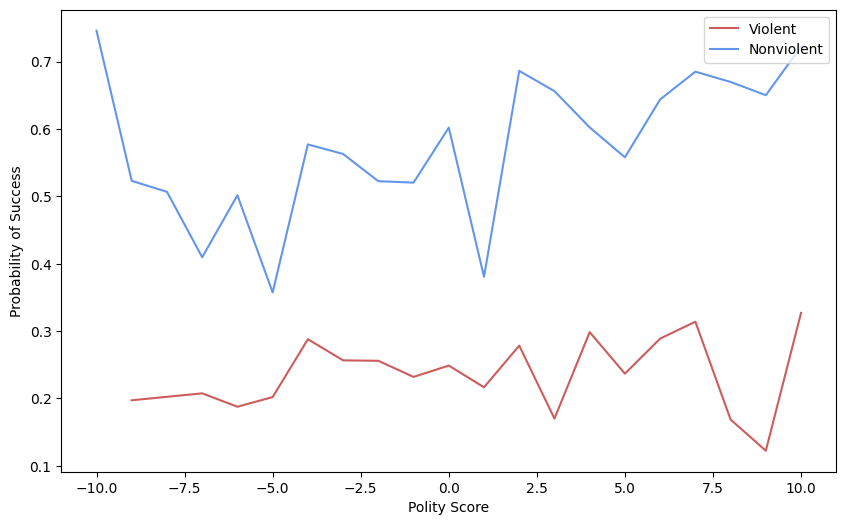

In [34]:
success_predicted_with_control = success_logit_res.predict(success[['NONVIOL', 'polity2', 'PARTICIPATION', 'POPULATION']])

plt.figure(figsize=(10, 6))
sns.lineplot(x='polity2', y=success_predicted_with_control, hue='NONVIOL', data=success, palette={0:'indianred', 1: 'cornflowerblue'}, errorbar=None)

plt.xlabel('Polity Score')
plt.ylabel('Probability of Success')

plt.legend(loc='upper right', labels=['Violent', 'Nonviolent'])

plt.show()

It's obvious that regardless of the type of regime—be it monarchy (-10), autocracy (<-6), anocracy (<5), or democracy (< 10)—nonviolent campaigns tend to have a **significantly higher** chance of success compared to their violent counterparts.